# BANK TERM DEPOSIT PREDICTION

Neetu Bam ,DS0622, neetu.k.bam@gmail.com

Importing Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Read Train Data

In [2]:
data_train = pd.read_csv("bankdata train.csv")
data_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
data_train.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [4]:
data_train.shape

(31647, 18)

Read Test Data


In [5]:
data_test = pd.read_csv("bankdata test.csv")
data_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [6]:
data_test.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [7]:
data_test.shape

(13564, 17)

In [8]:
data_train.housing=data_train.housing.map({'yes':1,'no':0})
data_train.housing.head(10)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: housing, dtype: int64

In [9]:
data_train.loan=data_train.loan.map({'yes':1,'no':0})
data_train.loan.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: loan, dtype: int64

In [10]:
data=data_train.append(data_test)
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,0,0,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,0,0,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,1,0,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,0,0,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,1,0,cellular,4,feb,380,1,-1,0,unknown,no


In [11]:
data.shape

(45211, 18)

Checking for null values

In [12]:
data.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed    13564
dtype: int64

Data Visualization

<AxesSubplot:xlabel='count', ylabel='job'>

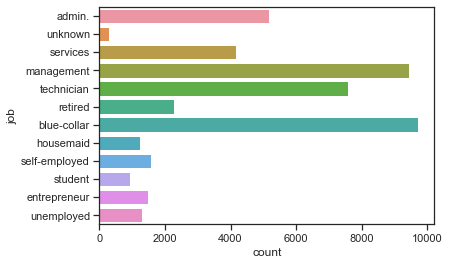

In [13]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data)


<AxesSubplot:xlabel='count', ylabel='housing'>

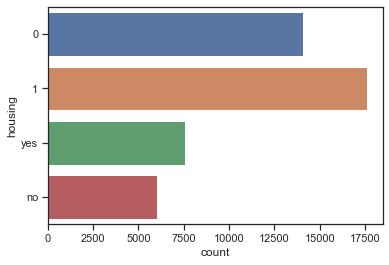

In [14]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='housing', data=data)

<AxesSubplot:xlabel='count', ylabel='marital'>

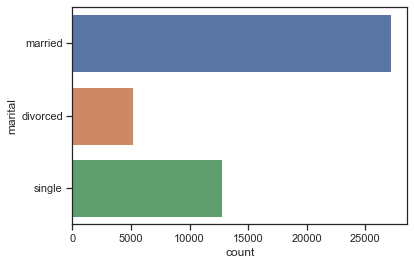

In [15]:
sns.countplot(y='marital', data=data)

In [16]:
data.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [17]:
data = data[data.marital != 'unknown']
data = data[data.loan != 'unknown']

<AxesSubplot:xlabel='count', ylabel='education'>

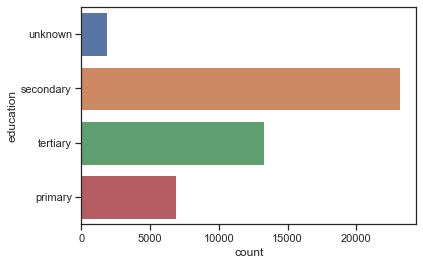

In [18]:
sns.countplot(y='education', data=data)

In [19]:
data = data[data.education != 'illiterate']


In [20]:
data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 13563
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   job         45211 non-null  object
 3   marital     45211 non-null  object
 4   education   45211 non-null  object
 5   default     45211 non-null  object
 6   balance     45211 non-null  int64 
 7   housing     45211 non-null  object
 8   loan        45211 non-null  object
 9   contact     45211 non-null  object
 10  day         45211 non-null  int64 
 11  month       45211 non-null  object
 12  duration    45211 non-null  int64 
 13  campaign    45211 non-null  int64 
 14  pdays       45211 non-null  int64 
 15  previous    45211 non-null  int64 
 16  poutcome    45211 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.6+ MB


From the above Picture, We can say that the data is imbalanced



<AxesSubplot:>

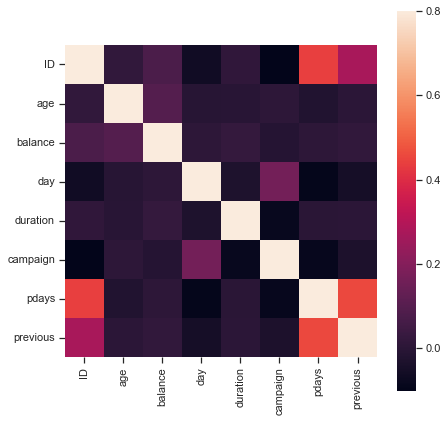

In [22]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True)

In [23]:
X=data.drop(columns=['ID','age','day','pdays',],axis=1)
Y=data['loan']
                           

In [24]:
print(X)

               job   marital  education default  balance housing loan  \
0           admin.   married    unknown      no     1933       0    0   
1          unknown   married  secondary      no        3       0    0   
2         services   married  secondary      no      891       1    0   
3       management  divorced   tertiary      no     3287       0    0   
4       technician   married  secondary      no      119       1    0   
...            ...       ...        ...     ...      ...     ...  ...   
13559   management   married   tertiary      no       45      no   no   
13560  blue-collar   married    primary      no     2281     yes   no   
13561      retired   married    primary      no      285     yes   no   
13562       admin.    single  secondary      no      464      no   no   
13563       admin.   married  secondary      no        2     yes   no   

         contact month  duration  campaign  previous poutcome subscribed  
0      telephone   nov        44         2      

In [25]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
13559    no
13560    no
13561    no
13562    no
13563    no
Name: loan, Length: 45211, dtype: object


In [26]:
#splitting the data into training data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
print(X.shape,X_train.shape,X_test.shape)

(45211, 14) (36168, 14) (9043, 14)


In [28]:
print(Y.shape,Y_train.shape,Y_test.shape)

(45211,) (36168,) (9043,)
